In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

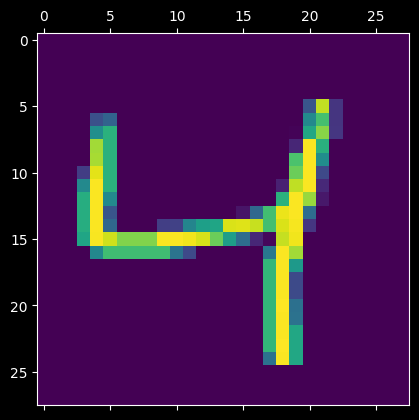

In [9]:
plt.matshow(X_train[2])

In [53]:
## Scaling the data
X_train = X_train/255
X_test = X_test/255

In [110]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))  # 10 neurons in the output layer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\MrGoku\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [111]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 678us/step - accuracy: 0.8112 - loss: 0.7268
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.9133 - loss: 0.3083
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9208 - loss: 0.2821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.9228 - loss: 0.2783
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.9273 - loss: 0.2581


In [112]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9130 - loss: 0.3049


[0.2685593366622925, 0.9247999787330627]

In [113]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step


array([[2.05359794e-02, 4.82490634e-07, 4.87892143e-02, ...,
        9.99828815e-01, 1.27049699e-01, 6.20525599e-01],
       [3.59469026e-01, 4.84732771e-03, 9.99099553e-01, ...,
        9.23838263e-13, 1.13647737e-01, 2.29368435e-09],
       [3.67556495e-04, 9.95366037e-01, 6.59216285e-01, ...,
        1.36816204e-01, 3.68176877e-01, 4.91418913e-02],
       ...,
       [2.95454083e-06, 6.80209223e-06, 1.00390695e-03, ...,
        2.68429786e-01, 6.09942317e-01, 7.17530251e-01],
       [6.83596081e-05, 2.38915221e-04, 1.12382637e-04, ...,
        4.82904907e-05, 5.86776376e-01, 8.97340069e-05],
       [6.22376287e-03, 5.67586977e-10, 1.04234874e-01, ...,
        8.06373457e-09, 1.31944558e-04, 5.54885276e-07]], dtype=float32)

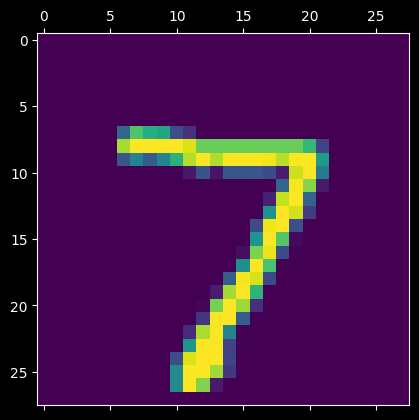

In [114]:
plt.matshow(X_test[0])

In [115]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step


array([2.0535979e-02, 4.8249063e-07, 4.8789214e-02, 9.7360212e-01,
       3.0102220e-03, 1.2106204e-01, 2.1470869e-06, 9.9982882e-01,
       1.2704970e-01, 6.2052560e-01], dtype=float32)

In [116]:
np.argmax(y_predicted[0])

7

## Confusion Matrix

In [117]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [118]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    3,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   12,  907,   17,   10,    4,   13,   12,   48,    2],
       [   2,    0,   14,  924,    0,   27,    2,   11,   25,    5],
       [   1,    1,    4,    1,  919,    0,   10,    4,   10,   32],
       [   9,    3,    3,   32,   10,  780,   13,    7,   29,    6],
       [   9,    3,    4,    1,    9,   14,  913,    2,    3,    0],
       [   1,    8,   18,   10,    7,    0,    0,  958,    2,   24],
       [   6,   11,    5,   20,    9,   28,    8,   12,  869,    6],
       [  11,    7,    1,   12,   30,    6,    0,   33,    8,  901]])>

Text(58.222222222222214, 0.5, 'Truth')

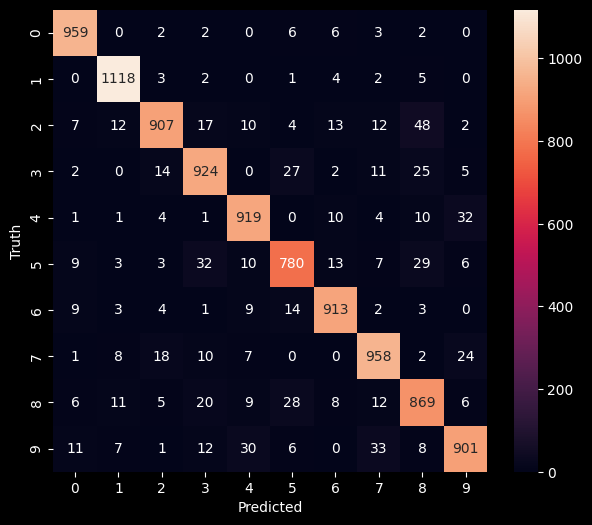

In [119]:
import seaborn as sn
plt.figure(figsize = (7,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding hidden layer

In [124]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(100, activation='relu'))  # 100 neurons in the hidden layer
model1.add(Dense(10, activation='sigmoid'))  # 10 neurons in the output layer
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\MrGoku\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [125]:
model1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8688 - loss: 0.4596
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9624 - loss: 0.1298 
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9747 - loss: 0.0857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9806 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0515


In [126]:
model1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.9718 - loss: 0.1004


[0.08364542573690414, 0.9757000207901001]

In [127]:
y_new_predicted = model1.predict(X_test)
y_new_predicted_labels = [np.argmax(i) for i in y_new_predicted]
new_cm = tf.math.confusion_matrix(labels=y_test, predictions=y_new_predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step


Text(58.222222222222214, 0.5, 'Truth')

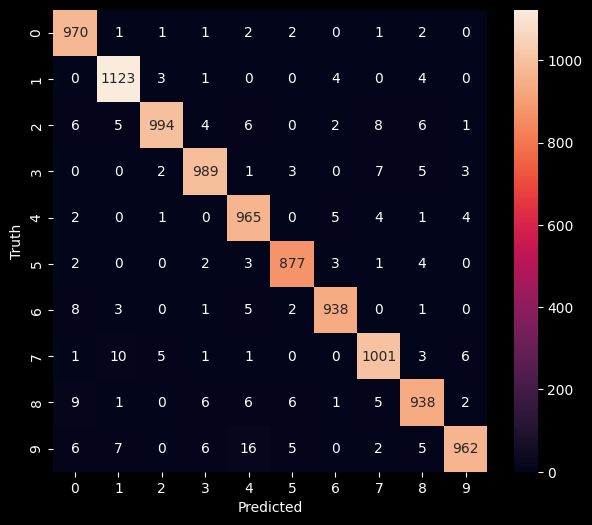

In [128]:
import seaborn as sn
plt.figure(figsize = (7,6))
sn.heatmap(new_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')